In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [8]:
#โหลดข้อมูล
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.468498,0.531470,-4.211241e-07,0.420840,0.534049,-0.018164,0.372530,0.479528,-0.019720,0.350781,...,0.466452,0.346181,-0.021319,0.473501,0.395893,-0.013486,0.471733,0.423425,-0.002338,stop
1,0.486552,0.434989,-3.871454e-07,0.432621,0.424208,-0.016460,0.384425,0.359498,-0.015830,0.359851,...,0.486478,0.236192,-0.007122,0.492651,0.282894,0.000884,0.488767,0.311814,0.011396,stop
2,0.411211,0.833627,-5.024751e-07,0.365356,0.804773,-0.017045,0.324766,0.732109,-0.020882,0.311014,...,0.440797,0.621766,-0.020635,0.434329,0.673679,-0.012095,0.432596,0.694539,-0.001750,stop
3,0.512555,0.781592,-2.872389e-07,0.470389,0.764166,-0.013721,0.428254,0.713172,-0.017797,0.413020,...,0.533170,0.598275,-0.026669,0.531315,0.636167,-0.021232,0.526116,0.665786,-0.013392,stop
4,0.477059,0.567780,-3.189342e-07,0.438438,0.574861,-0.019073,0.391281,0.522466,-0.023468,0.368443,...,0.475772,0.411503,-0.031264,0.482326,0.455772,-0.025058,0.481956,0.485508,-0.015839,stop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,0.564279,0.693706,2.465050e-07,0.557739,0.578799,-0.042601,0.556753,0.497934,-0.094185,0.580330,...,0.522947,0.750602,-0.181836,0.524827,0.728014,-0.161922,0.541988,0.721856,-0.144133,stright
1095,0.558860,0.693713,3.544574e-07,0.552735,0.596662,-0.025306,0.554511,0.513862,-0.061756,0.575972,...,0.522103,0.730890,-0.145126,0.532194,0.707095,-0.131282,0.548053,0.700747,-0.115568,stright
1096,0.503241,0.513498,5.514894e-07,0.526262,0.418081,-0.096120,0.553114,0.377679,-0.173888,0.595372,...,0.546937,0.724861,-0.208774,0.553406,0.729898,-0.220122,0.555251,0.744801,-0.230353,stright
1097,0.522011,0.689526,1.725507e-07,0.503031,0.597120,-0.055554,0.495779,0.532854,-0.113827,0.495433,...,0.506910,0.763332,-0.217573,0.492329,0.743425,-0.205983,0.498543,0.735741,-0.190054,stright


In [9]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.468498,0.531470,-4.211241e-07,0.420840,0.534049,-0.018164,0.372530,0.479528,-0.019720,0.350781,...,0.466452,0.346181,-0.021319,0.473501,0.395893,-0.013486,0.471733,0.423425,-0.002338,stop
1,0.486552,0.434989,-3.871454e-07,0.432621,0.424208,-0.016460,0.384425,0.359498,-0.015830,0.359851,...,0.486478,0.236192,-0.007122,0.492651,0.282894,0.000884,0.488767,0.311814,0.011396,stop
2,0.411211,0.833627,-5.024751e-07,0.365356,0.804773,-0.017045,0.324766,0.732109,-0.020882,0.311014,...,0.440797,0.621766,-0.020635,0.434329,0.673679,-0.012095,0.432596,0.694539,-0.001750,stop
3,0.512555,0.781592,-2.872389e-07,0.470389,0.764166,-0.013721,0.428254,0.713172,-0.017797,0.413020,...,0.533170,0.598275,-0.026669,0.531315,0.636167,-0.021232,0.526116,0.665786,-0.013392,stop
4,0.477059,0.567780,-3.189342e-07,0.438438,0.574861,-0.019073,0.391281,0.522466,-0.023468,0.368443,...,0.475772,0.411503,-0.031264,0.482326,0.455772,-0.025058,0.481956,0.485508,-0.015839,stop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,0.564279,0.693706,2.465050e-07,0.557739,0.578799,-0.042601,0.556753,0.497934,-0.094185,0.580330,...,0.522947,0.750602,-0.181836,0.524827,0.728014,-0.161922,0.541988,0.721856,-0.144133,stright
1095,0.558860,0.693713,3.544574e-07,0.552735,0.596662,-0.025306,0.554511,0.513862,-0.061756,0.575972,...,0.522103,0.730890,-0.145126,0.532194,0.707095,-0.131282,0.548053,0.700747,-0.115568,stright
1096,0.503241,0.513498,5.514894e-07,0.526262,0.418081,-0.096120,0.553114,0.377679,-0.173888,0.595372,...,0.546937,0.724861,-0.208774,0.553406,0.729898,-0.220122,0.555251,0.744801,-0.230353,stright
1097,0.522011,0.689526,1.725507e-07,0.503031,0.597120,-0.055554,0.495779,0.532854,-0.113827,0.495433,...,0.506910,0.763332,-0.217573,0.492329,0.743425,-0.205983,0.498543,0.735741,-0.190054,stright


In [10]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (1099, 63)
Labels shape = (1099,)


In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [ ]:
#SVM
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)

In [13]:
#Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [14]:
#K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [15]:
#Neural Network (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=0)
mlp.fit(x_train, y_train)
y_pred_mlp = mlp.predict(x_test)

In [16]:
#วัดผลโมเดลแต่ละตัว
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='micro')
    recall = recall_score(y_true, y_pred, average='micro')
    precision = precision_score(y_true, y_pred, average='micro')
    print(f"{model_name} Accuracy:", accuracy)
    print(f"{model_name} F1-score:", f1)
    print(f"{model_name} Recall:", recall)
    print(f"{model_name} Precision:", precision)

In [ ]:
#ประเมินผล
evaluate_model(y_test, y_pred_svm, "SVM")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_knn, "KNN")
evaluate_model(y_test, y_pred_mlp, "Neural Network (MLP)")

SVM Accuracy: 0.990909090909091
SVM F1-score: 0.990909090909091
SVM Recall: 0.990909090909091
SVM Precision: 0.990909090909091
Random Forest Accuracy: 0.9727272727272728
Random Forest F1-score: 0.9727272727272728
Random Forest Recall: 0.9727272727272728
Random Forest Precision: 0.9727272727272728
KNN Accuracy: 0.9772727272727273
KNN F1-score: 0.9772727272727273
KNN Recall: 0.9772727272727273
KNN Precision: 0.9772727272727273
Neural Network (MLP) Accuracy: 0.990909090909091
Neural Network (MLP) F1-score: 0.990909090909091
Neural Network (MLP) Recall: 0.990909090909091
Neural Network (MLP) Precision: 0.990909090909091


In [18]:
#คำนวณ Confusion Matrix และวาดกราฟ
def plot_confusion_matrix(y_test, y_pred, model_name):
    cf_matrix = confusion_matrix(y_test, y_pred)
    labels = sorted(list(set(df['Output'])))
    labels = [x.upper() for x in labels]

    fig, ax = plt.subplots(figsize=(12, 12))
    ax.set_title(f"Confusion Matrix - {model_name}")

    maping = sns.heatmap(cf_matrix, 
                         annot=True,
                         cmap=plt.cm.Blues, 
                         linewidths=.2,
                         xticklabels=labels,
                         yticklabels=labels, vmax=8,
                         fmt='g',
                         ax=ax)
    plt.show()

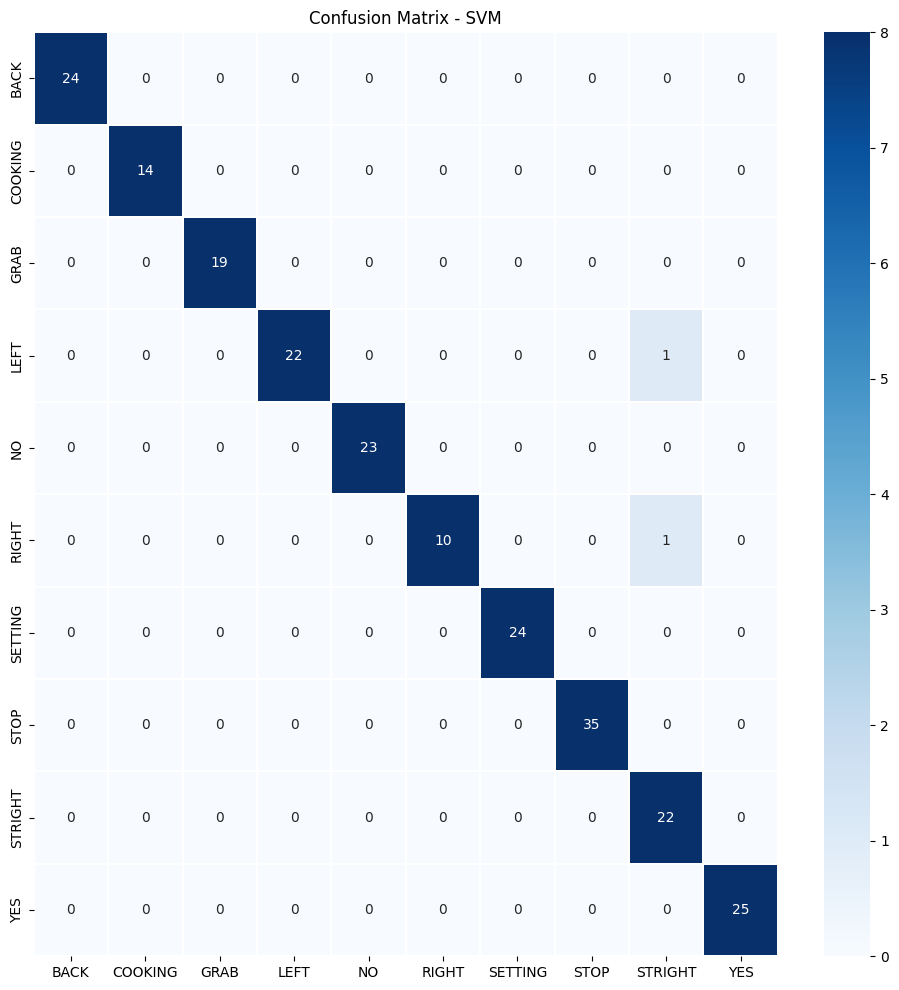

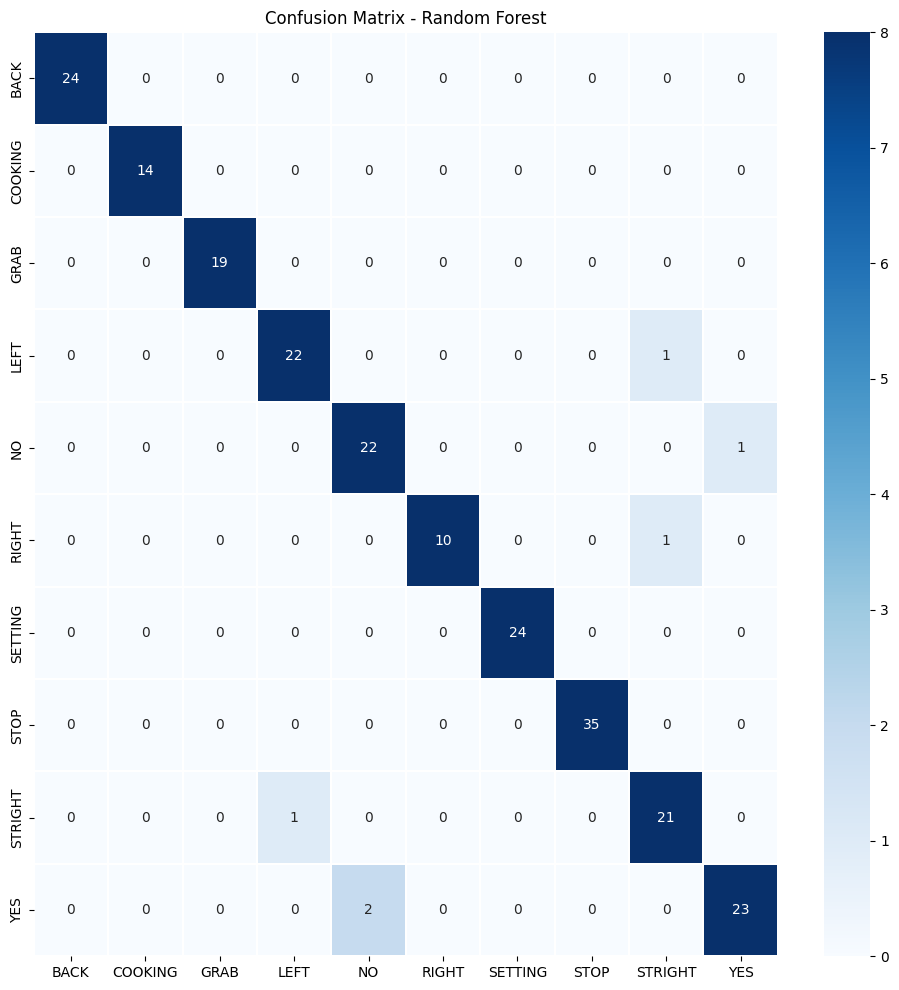

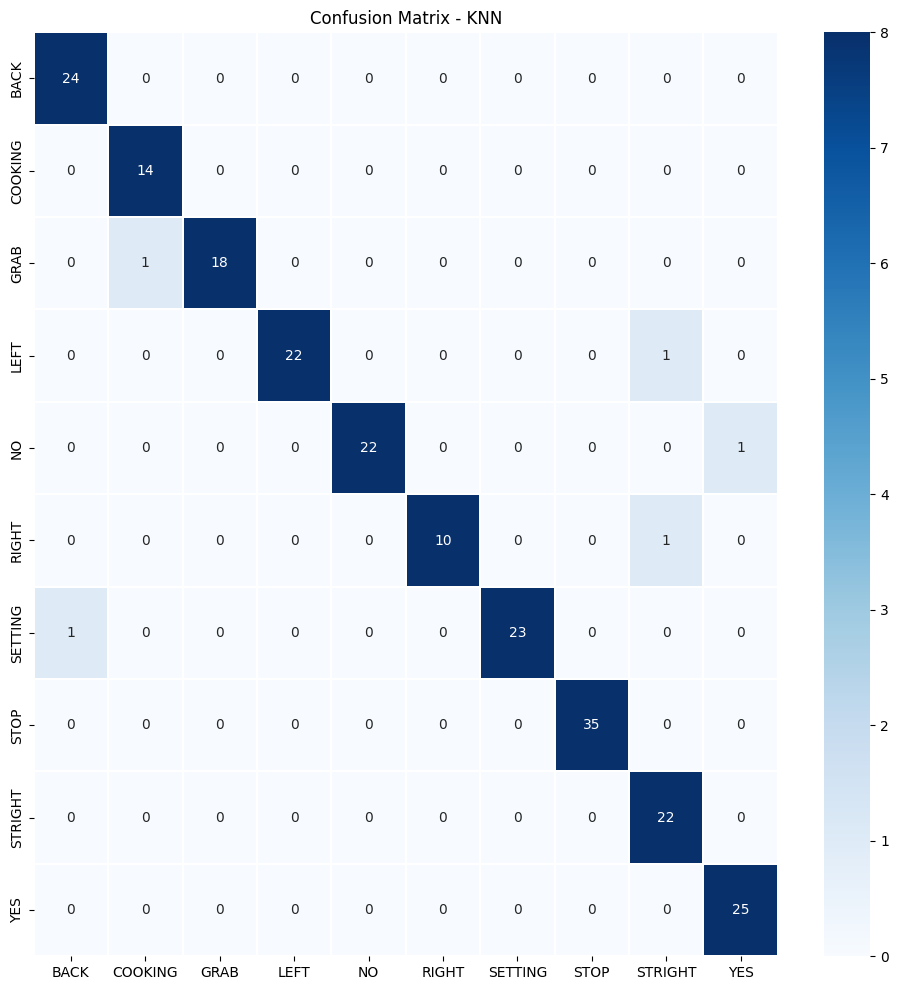

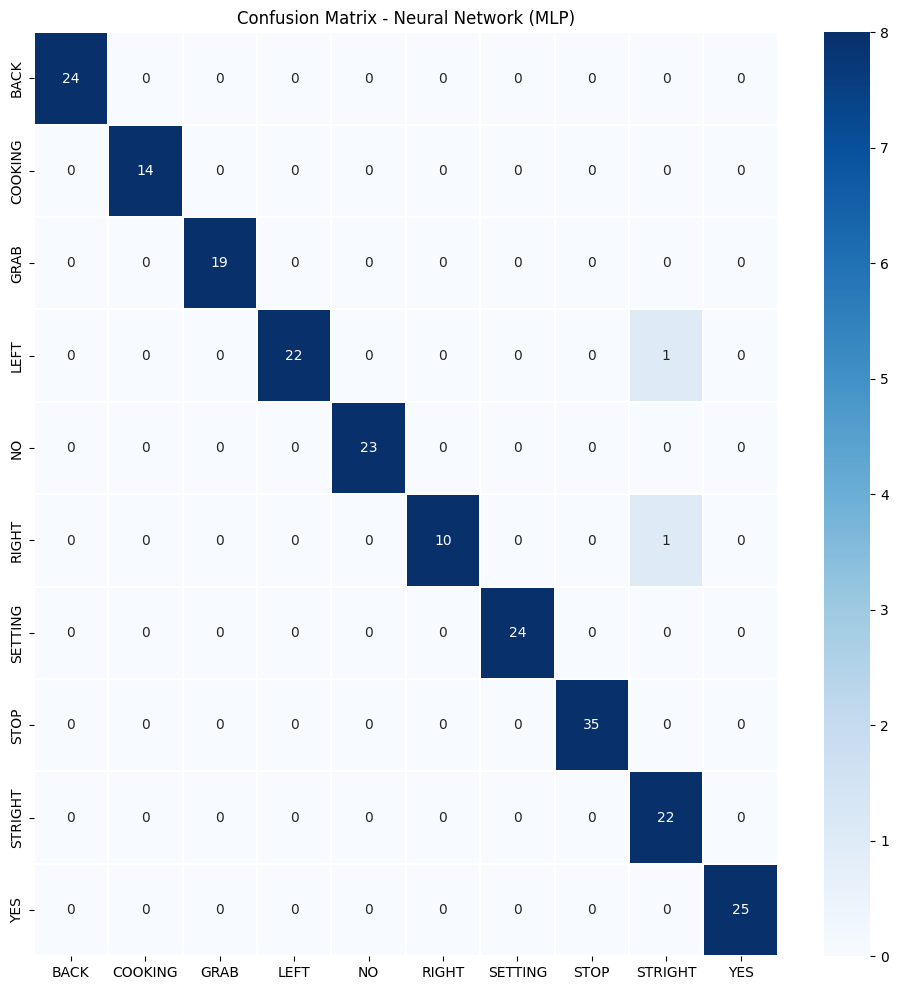

In [19]:
# วาด Confusion Matrix
plot_confusion_matrix(y_test, y_pred_svm, "SVM")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_knn, "KNN")
plot_confusion_matrix(y_test, y_pred_mlp, "Neural Network (MLP)")

In [20]:
with open('svm_model.pkl','wb') as f:
    pickle.dump(svm,f)

with open('rf_model.pkl','wb') as f:
    pickle.dump(rf,f)

with open('knn_model.pkl','wb') as f:
    pickle.dump(knn,f)

with open('mlp_model.pkl','wb') as f:
    pickle.dump(mlp,f)